# Iris Species Dataset Prediction

In [1]:
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

### Load the data
The sklearn library has the iris dataset in the sklearn.datasets module. The dataset is loaded through sklearn library.

In [2]:
# from sklearn.datasets import load_iris
# iris=load_iris()

In [3]:
# load Iris Flower dataset
iris = pd.read_csv('Iris.csv')

In [4]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Iris flower is divided into 3 speciestal Width

- Iris-setosa
- Iris-versicolor
- Iris-verginica

### The iris dataset consists of 4 features:


- Sepal Length- 
Sepal Widtdth

- Petal Length
- Petal Width

The objective of this project is to rxplore the dataset and predict the species given the four features of an iris flower.

In [5]:
iris.shape

(150, 6)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

A scatter plot between the sepal length and the sepal width is plotted to visualise the iris dataset.

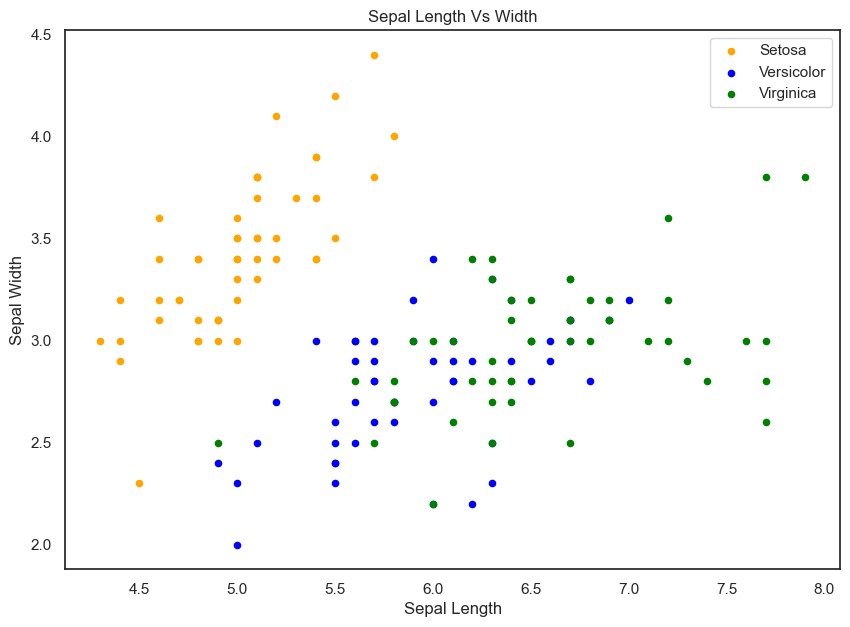

In [9]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

We see that the seapration between the blue dots(I.setosa) and red(I.versicolor) and green dots(I.virginica) is quite clear, while separating red dots from green dots seems a very difficult task given the two features available.

We visualise the data on different features- petal width and petal length.

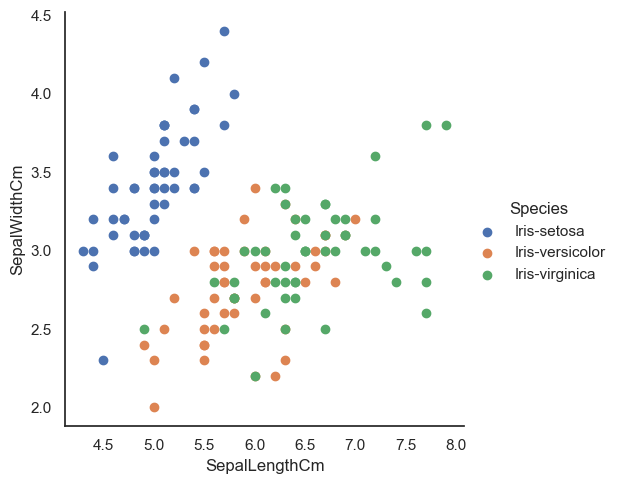

In [10]:
# Assuming 'iris' is your DataFrame
sns.FacetGrid(iris, hue='Species', height=5) \
    .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
    .add_legend()

plt.show()

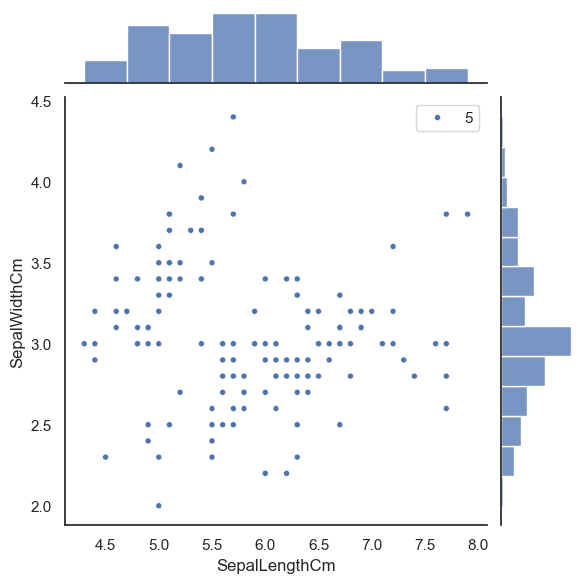

In [11]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm', data=iris, size=5)

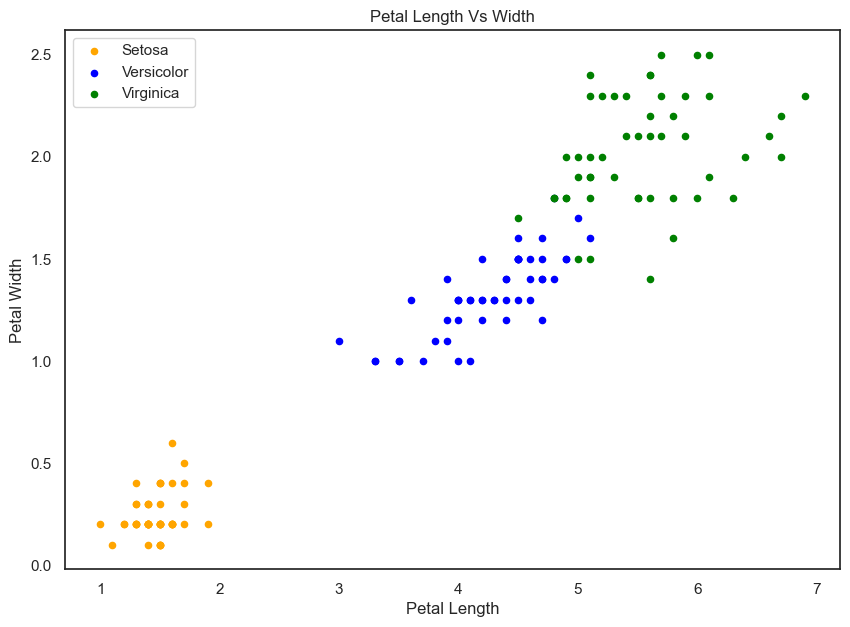

In [12]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

In [13]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


A scatter plot between the sepal length and the sepal width is plotted to visualise the iris dataset.

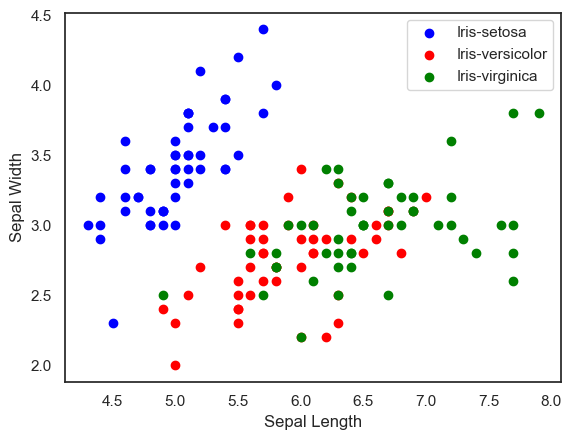

In [14]:
import matplotlib.pyplot as plt

features = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
labels = iris['Species']

labels_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['blue', 'red', 'green']

for i, species in enumerate(labels_names):
    px = features.iloc[:, 0][labels == species]
    py = features.iloc[:, 1][labels == species]
    plt.scatter(px, py, c=colors[i], label=species)

plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


We see that the seapration between the blue dots(I.setosa) and red(I.versicolor) and green dots(I.virginica) is quite clear, while separating red dots from green dots seems a very difficult task given the two features available.

We visualise the data on different features- petal width and petal length.

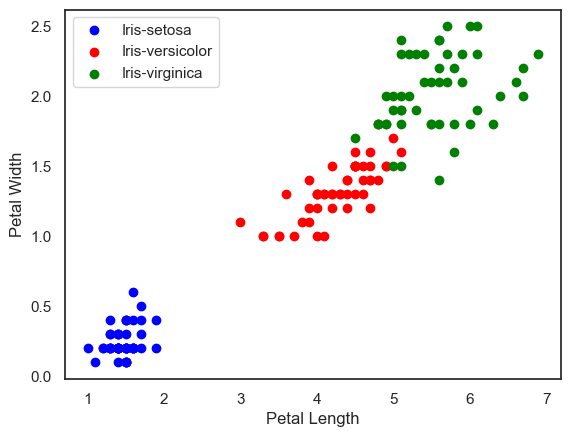

In [15]:
for i, species in enumerate(labels_names):
    px = features.iloc[:, 2][labels == species]
    py = features.iloc[:, 3][labels == species]
    plt.scatter(px, py, c=colors[i], label=species)

plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


In this case, the decision boundary between the green and the red dots can be easily determined.

Therefore, using all the features for training is a good choice.

## PCA: visualising the principle components

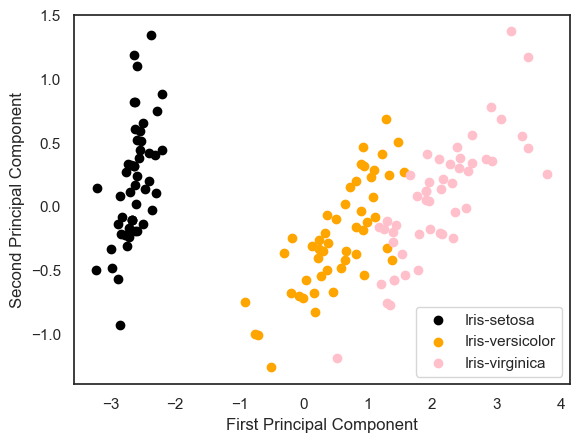

In [16]:
from sklearn.decomposition import PCA
colors = ['black', 'orange', 'pink']

est = PCA(n_components=2)
x_pca = est.fit_transform(features)

for i, species in enumerate(labels_names):
    px = x_pca[:, 0][labels == species]
    py = x_pca[:, 1][labels == species]
    plt.scatter(px, py, c=colors[i], label=species)

plt.legend()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


As can be seen from this plot, 2 principle components are sufficient to distinguish between the three classes. Hence, we use the data obtained frm the PCA transformation as training and testing data.

### Removing unneeded column

In [31]:
iris.drop("Id", axis=1, inplace = True)

In [32]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.

### Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

### Regression: If the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

#### Before we start, we need to clear some ML notations.
#### attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.
#### Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [33]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

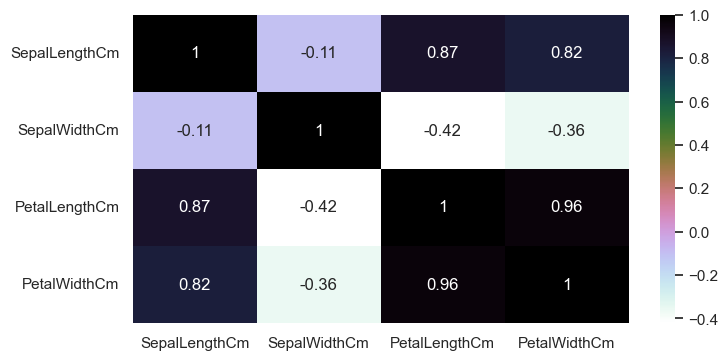

In [34]:
# Assuming 'iris' is your DataFrame
numeric_columns = iris.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix_r')
plt.show()

Observation---> The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

Steps To Be followed When Applying an Algorithm

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_pca, labels, test_size=0.4, random_state=33)

In [36]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train, y_train)

SVC()

In [37]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(decision_function_shape=None, gamma='auto')

In [38]:
pred = clf.predict(x_test)

In [39]:
from sklearn import metrics
print(metrics.classification_report(
    y_test, pred, target_names=labels_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.91      1.00      0.95        20
 Iris-virginica       1.00      0.91      0.95        23

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



We have computed precision, recall, and f1-score for each class and their average values. What we can see in this table is:set.

- The classifier obtained 1.0 precision and recall in the setosa and virginica class. This means that for precision, 100 percent of the instances that are classified as setosa and virginica are really setosa and virginica instances respectively.

- Recall value equals 1.0 for setosa and versicolor class. This means that 100 percent of the setosa and versicolor instances were classified as setosa and versicolor respectively.


The method used is very good at predicting all the three classes. The support value shows how many instances of each class we had in the testing set.

## Different Training parameters

In [40]:
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [41]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [42]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
77,6.7,3.0,5.0,1.7
83,6.0,2.7,5.1,1.6
48,5.3,3.7,1.5,0.2
3,4.6,3.1,1.5,0.2
55,5.7,2.8,4.5,1.3


In [43]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
128,6.4,2.8,5.6,2.1
19,5.1,3.8,1.5,0.3
29,4.7,3.2,1.6,0.2
116,6.5,3.0,5.5,1.8
51,6.4,3.2,4.5,1.5


In [44]:
train_y.head()

77    Iris-versicolor
83    Iris-versicolor
48        Iris-setosa
3         Iris-setosa
55    Iris-versicolor
Name: Species, dtype: object

## Support Vector Machine SVM

In [45]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9777777777777777


SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

## Logistic Regression

In [46]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9555555555555556


## Decision Tree

In [47]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9111111111111111


## K-Nearest Neighbors

In [48]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9555555555555556


## Let's check the accuracy for various values of n for K-Nearest nerighbours

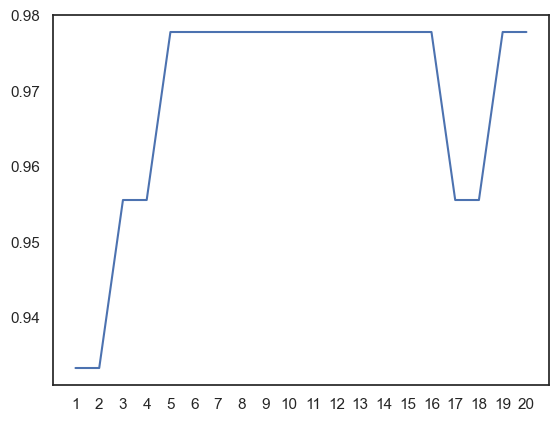

In [49]:
a_index = list(range(1, 21))
accuracy_values = []

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy_values.append(metrics.accuracy_score(prediction, test_y))

a = pd.Series(accuracy_values, index=a_index)
plt.plot(a.index, a.values)
plt.xticks(a.index)
plt.show()

Above is the graph showing the accuracy for the KNN models using different values of n.

## ## Creating Petals And Sepals Training Data


In [50]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

## For Iris Petal

In [51]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

## For Iris Sepal

In [52]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

## SVM Algorithm

In [53]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


## Logistic Regression

In [54]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


## K-Nearest Neighbors

In [55]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


### Observations:

- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas     the correlation between Petal Width and Length was very high.